<div class="alert alert-block alert-success">
<h3>Aim:</h3>
In this project, we aim to utilize the tweets activity data of different users to identify the top 20 influencers. We also explore how the profits change when an analytical model is employeed to identify influencers through a hypothehical scenario.
    

### Approach:
#### Part-1
We utilized a Kaggle dataset containing tweets data to build a model to predict influencers. Each observation in the dataset describes two individuals A and B. 'Choice' column in each row shows who among A or B are more influential.
Choice = “1” implies A is more influential than B.
Choice = “0” implies B is more influential than A.
Using this dataset, we created analytics models to classify influencers and identified the best predictors of influence.
#### Part-2
We utilised another file containing tweets of different users. We used the influence scores of best model from Part 1 and concepts of network analytics to identify the top 20 influencers.
</div>

### Part-1

In [96]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [97]:
df=pd.read_csv('train.csv')

In [98]:
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874855,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


### Data Cleaning and Transformation

#### Checking for null values


In [99]:
df.isnull().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

There are no null values in the dataset

#### Transforming the independent variables to A-B format to make them interpretable

In [100]:
df_new=pd.DataFrame()

In [102]:
df_new['follower_count_diff']=df['A_follower_count']-df['B_follower_count']
df_new['following_count_diff']=df['A_following_count']-df['B_following_count']
df_new['listed_count_diff']=df['A_listed_count']-df['B_listed_count']
df_new['mentions_received_diff']=df['A_mentions_received']-df['B_mentions_received']
df_new['retweets_received_diff']=df['A_retweets_received']-df['B_retweets_received']
df_new['mentions_sent_diff']=df['A_mentions_sent']-df['B_mentions_sent']
df_new['retweets_sent_diff']=df['A_retweets_sent']-df['B_retweets_sent']
df_new['posts_diff']=df['A_posts']-df['B_posts']
df_new['network_feature_1_diff']=df['A_network_feature_1']-df['B_network_feature_1']
df_new['network_feature_2_diff']=df['A_network_feature_2']-df['B_network_feature_2']
df_new['network_feature_3_diff']=df['A_network_feature_3']-df['B_network_feature_3']

In [103]:
df_new.head()

,follower_count_diff,following_count_diff,listed_count_diff,mentions_received_diff,retweets_received_diff,mentions_sent_diff,retweets_sent_diff,posts_diff,network_feature_1_diff,network_feature_2_diff,network_feature_3_diff
0,-34235,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,-17671,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149289
2,3688,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,-19542,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,38035,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


#### Normalizing all the features to bring all the data values to a common scale

In [104]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
df_norm= pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)

In [105]:
#normalised features
df_norm.head()

,follower_count_diff,following_count_diff,listed_count_diff,mentions_received_diff,retweets_received_diff,mentions_sent_diff,retweets_sent_diff,posts_diff,network_feature_1_diff,network_feature_2_diff,network_feature_3_diff
0,0.507400,0.347553,0.510798,0.500196,0.500128,0.447178,0.496772,0.482830,0.501019,0.659024,0.386341
1,0.507632,0.363888,0.511084,0.500224,0.500151,0.516176,0.521014,0.510640,0.501167,0.588358,0.335476
2,0.507932,0.364108,0.512285,0.500213,0.500143,0.531015,0.519267,0.507738,0.501104,0.647840,0.369221
3,0.507606,0.354055,0.512124,0.499956,0.499684,0.329091,0.283996,0.424157,0.500097,0.620181,0.336865
4,0.508414,0.363242,0.514698,0.500258,0.500170,0.637644,0.572905,0.550002,0.501308,0.654856,0.346725


## Classification Models

### Model 1:  Logistic Regression

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

Accuracy of Logistic Regression Model on validation set: 68.48%


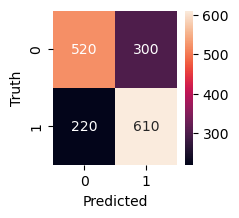

In [107]:
X=df_norm
y=df['Choice']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression( random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Logistic Regression Model on validation set: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Model 2: Bagging

In [108]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd


base_cls = DecisionTreeClassifier(random_state=42)
n_estimators_range = [10, 50, 100, 200, 500] 
best_score = 0
best_n_estimators = 0


for n_estimators in n_estimators_range:
    # Initialize the Bagging classifier with the current number of trees
    bagging_cls = BaggingClassifier(estimator=base_cls,n_estimators=n_estimators,random_state=42)

    # Evaluate the bagging classifier using cross-validation
    scores = cross_val_score(bagging_cls, X_train, y_train, cv=5)  # 5-fold cross-validation

    # Calculate the mean score
    mean_score = np.mean(scores)

    # Print the result
    print(f"Number of estimators: {n_estimators}, Cross-Validated Accuracy: {mean_score:.2f}")

    # Update the best_score and best_n_estimators if the current score is better
    if mean_score > best_score:
        best_score = mean_score
        best_n_estimators = n_estimators

# Print the best number of estimators
print(f"The best number of estimators is {best_n_estimators} with a cross-validation score of {best_score:.2f}")


Number of estimators: 10, Cross-Validated Accuracy: 0.75
Number of estimators: 50, Cross-Validated Accuracy: 0.76
Number of estimators: 100, Cross-Validated Accuracy: 0.77
Number of estimators: 200, Cross-Validated Accuracy: 0.77
Number of estimators: 500, Cross-Validated Accuracy: 0.76
The best number of estimators is 200 with a cross-validation score of 0.77


### Fit the best Bagging model on the entire training set

Accuracy of the Bagging Classifier on the validation set: 76.48%


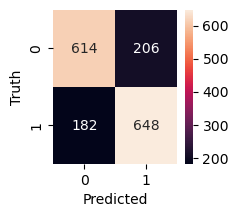

In [109]:
best_bagging_cls = BaggingClassifier(estimator=base_cls,
                                     n_estimators=best_n_estimators,
                                     random_state=42)
best_bagging_cls.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_bag = best_bagging_cls.predict(X_test)

# Evaluate accuracy on the test set
accuracy_bag = accuracy_score(y_test, y_pred_bag)
print(f'Accuracy of the Bagging Classifier on the validation set: {accuracy_bag*100:.2f}%')

cm = confusion_matrix(y_test, y_pred_bag)

plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Model 3: Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200,300],  
    'max_features': [1,2,3,4,5,6,7,8,9,10,11] 
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the GridSearchCV instance to find the best model
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_features': 2, 'n_estimators': 300}


In [111]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
optimal_rf = RandomForestClassifier(n_estimators=300, max_features=2, random_state=42)

# Train the Random Forest Classifier
optimal_rf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
y_pred_rf = optimal_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy of Random Forest Model on the validation set: {accuracy_rf*100:.2f}%')

Accuracy of Random Forest Model on the validation set: 76.79%


In [113]:
feature_scores_rf = pd.Series(optimal_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores_rf 

listed_count_diff         0.158168
follower_count_diff       0.126802
network_feature_1_diff    0.120826
retweets_received_diff    0.100485
mentions_received_diff    0.091520
mentions_sent_diff        0.072841
posts_diff                0.068105
network_feature_3_diff    0.066907
network_feature_2_diff    0.066665
following_count_diff      0.066059
retweets_sent_diff        0.061622
dtype: float64

<div class="alert alert-block alert-success">
    <p><b><h3>Best Model:</h3></b><p>
<p><b> Accuracy of Logistic Regression Model: 68.48%</b><p>  
<p><b> Accuracy of Bagging Model: 76.48%</b><p>  
<p><b> Accuracy of Random Forest Model: 76.79%</b><p>
    

<p><b><h4>Therefore, our best model is a Random Forest model with 300 estimators and 2 features. The accuracy of this model is 76.79%</h4></b>.<p>

   
</div>



Confusion Matrix for the Random Forest Model


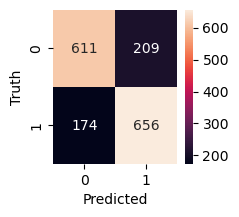

In [114]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(2,2))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('Confusion Matrix for the Random Forest Model')
plt.show()

<div class="alert alert-block alert-success">
  <p><b><h3>Which factors are best predictors of influence?</h3></b><p>  
 <p>Random Forest is our best model but to find the best predictors of influence, we are using Logistic Regression as it provides better interpretability.<p>
   
</div>



In [115]:
#feature importance from Logistic Regression Model
coefficients = model.coef_[0]

feature_importance_lr=pd.Series(coefficients, index=X_train.columns).sort_values(ascending=False)

feature_importance_lr

follower_count_diff       6.904485
listed_count_diff         5.139088
retweets_sent_diff        4.127734
network_feature_3_diff    2.566454
network_feature_2_diff    2.534091
network_feature_1_diff    1.800783
mentions_sent_diff        1.767706
following_count_diff      1.499999
posts_diff                0.990924
retweets_received_diff    0.402550
mentions_received_diff    0.290235
dtype: float64

<Axes: title={'center': 'Feature Importance for Logistic Regression'}>

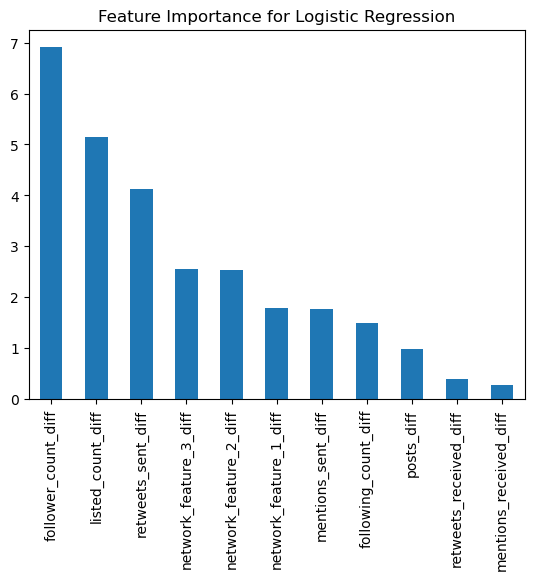

In [116]:
feature_importance_lr.plot(kind='bar', title='Feature Importance for Logistic Regression')

<div class="alert alert-block alert-success">
   <p><b><h3>Best Predictors of Influence:</h3></b><p>
<p>We found that the following features are most significant in determining the influence:<p>
<p><b>1. follower_count_diff</b><p>
<p><b>2. listed_count_diff</b><p>
<p><b>3. retweets_sent_diff</b><p>
<p><b>4. network_feature_3_diff (presumably closeness centrality)</b><p>
<p><b>5. network_feature_2_diff (presumably betweenness centrality)</b><p>

<p>_______________________________________________________________________________________________________________________________________<p>
    
    
<p>Our findings suggest that <b>follower_count_diff</b>, <b>listed_count_diff</b>, and <b>retweet_sent_diff</b> are the most important predictors. This aligns with the common understanding as well, as individuals who have a higher number of followers and are listed more often are likely to be considered more influential. Individuals who have a high number of retweets can be considered more active and engaged and thus more influential.<p>
<p>Interestingly, we also observed that individuals with higher closeness and betweenness are more influential than those with lower closeness and betweenness which makes sense because these are individuals who can spread information fast (high closeness) as well as to the disparate parts of the network (high betweenness).<p>

    

<p><b><h3>Business Use Case</h3></b><p>
Businesses can leverage the insights from this model whenever there is a new product launch or a new Social Media Marketing Campaign by identifying the most influential individuals as predicted by our model who can influence a larger population. This will enable them to maximize their outreach as well as return on investments.
    
   
</div>



## Financial Value of the Model

#### Without Aanlytics:
1. Retailer offers $5 to each person (A and B) to tweet once. 

2. If an influencer tweets once, there is a 0.01% chance that his/her followers will buy one unit of a product.

3. Assume the retailer has a profit margin of $10 per unit, and that one customer can buy only one unit. 



#### Calculation
Without any analytics, the total cost for each row is $10 ($5 to each person) and the total revenue from each row would (follower_count) * (be 0.01%) * 10. Subrtacting the two quantities will give us profit.




In [117]:
df_foll=df[['Choice','A_follower_count', 'B_follower_count']]
df_foll.head()

,Choice,A_follower_count,B_follower_count
0,0,228,34463
1,0,21591,39262
2,0,7310,3622
3,0,20,19562
4,1,45589,7554


In [118]:
df_foll['profit_without_analytics']=df['Choice']*df['A_follower_count']*0.0001*10 + (1-df['Choice'])*df['B_follower_count']*0.0001*10-10
                                                                                                     
prof_without_analytics=df_foll['profit_without_analytics'].sum()   

print('Without utilizing any analytics, the profit is:','$' +str(prof_without_analytics))

Without utilizing any analytics, the profit is: $5321568.593


/var/folders/78/vkblh4vj27d5k_r_t8cffl480000gn/T/ipykernel_2922/874874477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foll['profit_without_analytics']=df['Choice']*df['A_follower_count']*0.0001*10 + (1-df['Choice'])*df['B_follower_count']*0.0001*10-10


#### Using the Analytics Model:
1. If an influencer tweets twice, the overall buying probability will be 0.015%.
2. The retailer offers $10 to those identified as influencers by the model to send two tweets each.

#### Calculation:
1. For predictions, we are using the Random Forest model as it has the highest accuracy. Whereever we have the predicted value equal to the true value are the cases where the influencers are identified correctly.
2. When A is correctly identfied as influencer, then the profit for that row will be (A_follower_count)*(0.015%)*10-10
3. When B is correctly identfied as influencer, then the profit for that row will be (B_follower_count)*(0.015%)*10-10


In [119]:
y_pred_rf1 = optimal_rf.predict(X)

In [120]:
df_foll['Prediction']=y_pred_rf1

/var/folders/78/vkblh4vj27d5k_r_t8cffl480000gn/T/ipykernel_2922/4015501120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foll['Prediction']=y_pred_rf1


In [121]:
mask1=df_foll['Choice']==df_foll['Prediction'] 
mask2=df_foll['Prediction']==1

In [122]:
A_profit=df_foll[mask1 & mask2]['A_follower_count']*0.00015*10-10
A_profit.sum()

3723228.6279999996

In [123]:
mask3=df_foll['Choice']==df_foll['Prediction'] 
mask4=df_foll['Prediction']==0

In [124]:
B_profit=df_foll[mask3 & mask4]['B_follower_count']*0.00015*10-10
B_profit.sum()

4047908.0819999995

In [125]:
profit_with_analytics=A_profit.sum()+B_profit.sum()

In [126]:
print('Using Analytics the profit is:','$' +str(profit_with_analytics))

Using Analytics the profit is: $7771136.709999999


#### Lift in Profit:

In [127]:
#Lift in Expected Profit by using our model
lift=profit_with_analytics-prof_without_analytics

In [128]:
lift_per=((profit_with_analytics-prof_without_analytics)/prof_without_analytics)*100

In [129]:
print('Increase in Expected Profit by using our model is :','$' +str(lift))
print('Lift in Expected Profit by using our analytical model is :',round(lift_per,2),'%')

Increase in Expected Profit by using our model is : $2449568.1169999987
Lift in Expected Profit by using our analytical model is : 46.03 %


#### Profit from Perfect Analytical Model:
A perfect analytical model is the one where every predicted value is same as the 'Choice'. In other words, there are no misclassifications.

In [130]:
df_foll['Perfect_Prediction']=df_foll['Choice']

/var/folders/78/vkblh4vj27d5k_r_t8cffl480000gn/T/ipykernel_2922/3660960161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foll['Perfect_Prediction']=df_foll['Choice']


In [131]:
mask5=df_foll['Perfect_Prediction']==1

In [132]:
A_profit_perfect=df_foll[mask5]['A_follower_count']*0.00015*10-10

In [133]:
A_profit_perfect.sum()

3825661.8525

In [134]:
mask6=df_foll['Perfect_Prediction']==0
B_profit_perfect=df_foll[mask6]['B_follower_count']*0.00015*10-10

In [135]:
B_profit_perfect.sum()

4184191.0369999995

In [136]:
perfect_profit_with_analytics=A_profit_perfect.sum()+B_profit_perfect.sum()
lift_perfect=((perfect_profit_with_analytics-prof_without_analytics)/prof_without_analytics)*100

In [137]:
print('Using a perfect analytical model, the profit will be:','$' +str(perfect_profit_with_analytics))
print('Lift in Expected Profit from the perfect analytical model would be:',round(lift_perfect,2),'%')

Using a perfect analytical model, the profit will be: $8009852.8895
Lift in Expected Profit from the perfect analytical model would be: 50.52 %


### Part-2

In [139]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

In [140]:
df_tweets=pd.read_csv('tweets.csv')

In [141]:
df_tweets.head()

,ids,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text
0,1.409150e+18,2Sherryazar1956,1992,1,NaN,0,2475,0,NW Arkansas,RT @jimmichael720: Biden doesn't have the ball...
1,1.049790e+18,TrueCrimePoli,652,8,NaN,0,846,0,"Boston, MA",RT @ChrisStigall: Biden says\n\nBiden says inf...
2,1.357290e+18,WintWahLwin15,118,162,NaN,0,313,0,NaN,"RT @ForeignPolicy: ""A U.S.-India alliance woul..."
3,3.617900e+09,england_donald,523,65,NaN,0,263,2,"Florida, USA",RT @CoryMillsFL: While Bidens State Department...
4,1.360330e+18,Brenda18291262,280,314,NaN,0,724,0,NaN,RT @Chicago1Ray: If Illegals can file suit on ...


In [142]:
tweets=df_tweets[[' screen_name',' inreplyto','text']]

In [143]:
tweets.head()

,screen_name,inreplyto,text
0,2Sherryazar1956,NaN,RT @jimmichael720: Biden doesn't have the ball...
1,TrueCrimePoli,NaN,RT @ChrisStigall: Biden says\n\nBiden says inf...
2,WintWahLwin15,NaN,"RT @ForeignPolicy: ""A U.S.-India alliance woul..."
3,england_donald,NaN,RT @CoryMillsFL: While Bidens State Department...
4,Brenda18291262,NaN,RT @Chicago1Ray: If Illegals can file suit on ...


In [144]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anmolagrawal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [145]:
def extract_words (text):
    return word_tokenize(text)
tweets['text_tokens']=tweets['text'].map(extract_words)

/var/folders/78/vkblh4vj27d5k_r_t8cffl480000gn/T/ipykernel_2922/1372939263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['text_tokens']=tweets['text'].map(extract_words)


In [146]:
tweets.head()

,screen_name,inreplyto,text,text_tokens
0,2Sherryazar1956,NaN,RT @jimmichael720: Biden doesn't have the ball...,"[RT, @, jimmichael720, :, Biden, does, n't, ha..."
1,TrueCrimePoli,NaN,RT @ChrisStigall: Biden says\n\nBiden says inf...,"[RT, @, ChrisStigall, :, Biden, says, Biden, s..."
2,WintWahLwin15,NaN,"RT @ForeignPolicy: ""A U.S.-India alliance woul...","[RT, @, ForeignPolicy, :, ``, A, U.S.-India, a..."
3,england_donald,NaN,RT @CoryMillsFL: While Bidens State Department...,"[RT, @, CoryMillsFL, :, While, Bidens, State, ..."
4,Brenda18291262,NaN,RT @Chicago1Ray: If Illegals can file suit on ...,"[RT, @, Chicago1Ray, :, If, Illegals, can, fil..."


In [147]:
tweets_df=tweets[[' screen_name',' inreplyto','text_tokens']]

In [148]:
tweets_df.head()

,screen_name,inreplyto,text_tokens
0,2Sherryazar1956,NaN,"[RT, @, jimmichael720, :, Biden, does, n't, ha..."
1,TrueCrimePoli,NaN,"[RT, @, ChrisStigall, :, Biden, says, Biden, s..."
2,WintWahLwin15,NaN,"[RT, @, ForeignPolicy, :, ``, A, U.S.-India, a..."
3,england_donald,NaN,"[RT, @, CoryMillsFL, :, While, Bidens, State, ..."
4,Brenda18291262,NaN,"[RT, @, Chicago1Ray, :, If, Illegals, can, fil..."


In [149]:
import pandas as pd

# Define the columns for the new DataFrame
columns = ['screen_name', 'target', 'interaction_type']

# Create an empty DataFrame with the specified columns
network_df = pd.DataFrame(columns=columns)


for index, row in tweets_df.iterrows():
    l = row['text_tokens']
    if l[0] == 'RT' and l[1] == '@':
        # Use the length of network_df to determine the next index
        next_index = len(network_df)
        # Append the data to the network_df using loc
        network_df.loc[next_index] = [row[' screen_name'], l[2], 'Retweet']
        
    if 'RT' not in l: 
        for i in range(0,len(l)):
             if l[i]== '@':
                next_index = len(network_df)
                network_df.loc[next_index] = [row[' screen_name'], l[i+1], 'Mention']
    if 'RT' in l:  
        for i in range(2,len(l)):
             if l[i]== '@':
                next_index = len(network_df)
                network_df.loc[next_index] = [row[' screen_name'], l[i+1], 'Mention']
    #for i in range(0,len(l)):
    if 'RT' not in l and '@' not in l:
                next_index = len(network_df)
                network_df.loc[next_index] = [row[' screen_name'], row[' screen_name'], 'Original']
    if pd.notnull(row[' inreplyto']) and row[' inreplyto'].strip() != '':
#     if row[' inreplyto'].str.strip()!='':
                next_index = len(network_df)
                network_df.loc[next_index] = [row[' screen_name'], row[' inreplyto'], 'Reply']
    
#     non_blank_target_df = network_df[network_df['target'].str.strip() != '']
#     is not None:

In [150]:
network_df.head()

,screen_name,target,interaction_type
0,2Sherryazar1956,jimmichael720,Retweet
1,TrueCrimePoli,ChrisStigall,Retweet
2,WintWahLwin15,ForeignPolicy,Retweet
3,england_donald,CoryMillsFL,Retweet
4,Brenda18291262,Chicago1Ray,Retweet


In [151]:
import networkx as nx
import matplotlib.pyplot as plt

In [153]:
# Create a directed graph from the dataframe
G = nx.from_pandas_edgelist(network_df, 'screen_name', 'target', create_using=nx.DiGraph())

# Calculate the degree for each node (for a DiGraph it will be the sum of in_degree and out_degree)
degree_dict = {node: val for node, val in G.degree()}

# Calculate betweenness centrality for each node
betweenness_dict = nx.betweenness_centrality(G)

# Calculate closeness centrality for each node
closeness_dict = nx.closeness_centrality(G)

# Convert the dictionaries to dataframes
degree_df = pd.DataFrame(degree_dict.items(), columns=['Node', 'Degree'])
betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=['Node', 'Betweenness'])
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['Node', 'Closeness'])

# Merge the dataframes into a single dataframe
metrics_df = degree_df.merge(betweenness_df, on='Node').merge(closeness_df, on='Node')

metrics_df[:5]

,Node,Degree,Betweenness,Closeness
0,2Sherryazar1956,2,0.000000e+00,0.000000
1,jimmichael720,5,3.934862e-07,0.000887
2,TrueCrimePoli,1,0.000000e+00,0.000000
3,ChrisStigall,3,0.000000e+00,0.000443
4,WintWahLwin15,1,0.000000e+00,0.000000


### Visualizing the Network

In [155]:
from pyvis.network import Network
import networkx as nx

G = nx.from_pandas_edgelist(network_df, 'screen_name', 'target')
from pyvis.network import Network

# Initialize a Pyvis network object
nt = Network(notebook=True, height="750px", width="100%")

# Import the NetworkX graph
nt.from_nx(G)

# Customize the visualization (optional)
nt.toggle_physics(True)  # Enable physics for automatic node placement

# Show the network
nt.show("network.html")

network.html


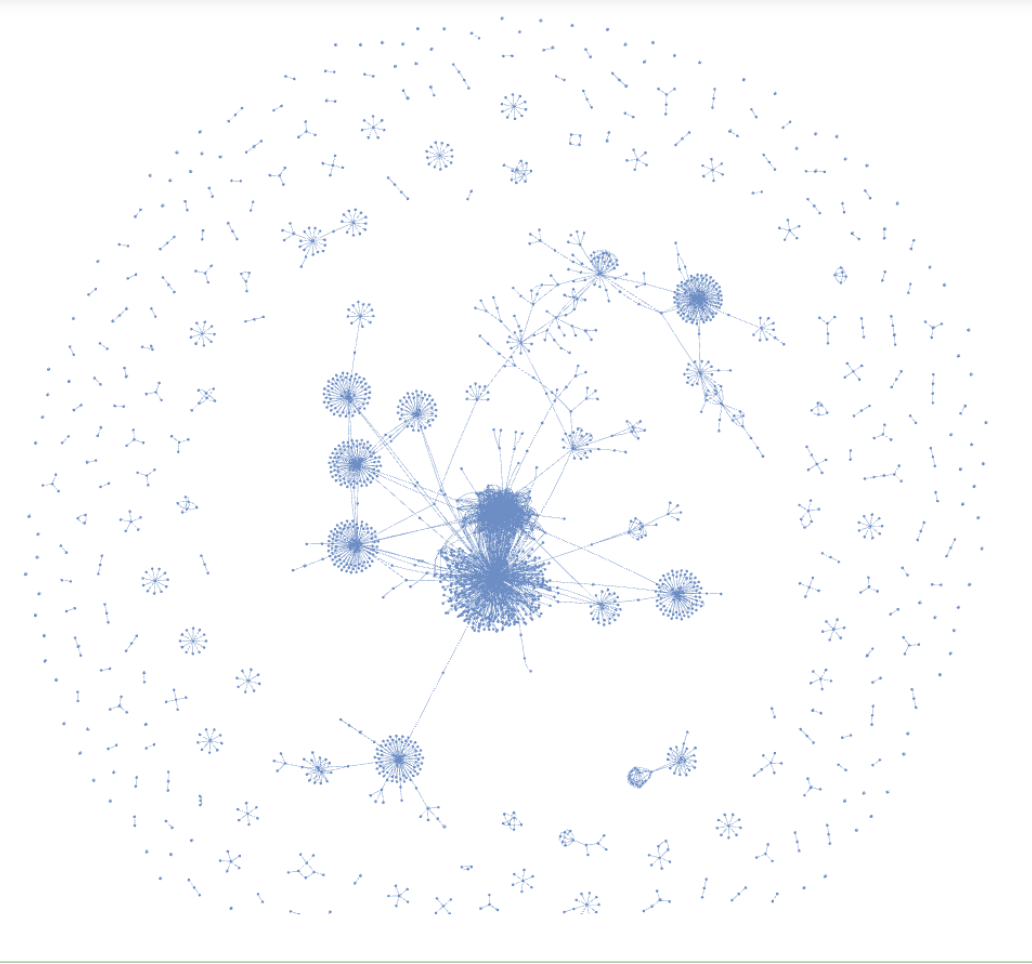


### Identifying the Top Influencers

<div class="alert alert-block alert-success">
To find the top influencers, we used the feature importance weights from our Random Forest Model since it has the highest prediction accuracy.
We use the degree, betweenness and closeness weights to calculate the influence score of each influencer
</div>

In [156]:
#feature importance from the Random Forest Model
feature_scores_rf

listed_count_diff         0.158168
follower_count_diff       0.126802
network_feature_1_diff    0.120826
retweets_received_diff    0.100485
mentions_received_diff    0.091520
mentions_sent_diff        0.072841
posts_diff                0.068105
network_feature_3_diff    0.066907
network_feature_2_diff    0.066665
following_count_diff      0.066059
retweets_sent_diff        0.061622
dtype: float64

<div class="alert alert-block alert-success">
Since the scales of degree, betweenness and closenss vary, we normalise the them to treat all of them equally.
</div>

In [157]:
metrics_df[:5]

,Node,Degree,Betweenness,Closeness
0,2Sherryazar1956,2,0.000000e+00,0.000000
1,jimmichael720,5,3.934862e-07,0.000887
2,TrueCrimePoli,1,0.000000e+00,0.000000
3,ChrisStigall,3,0.000000e+00,0.000443
4,WintWahLwin15,1,0.000000e+00,0.000000


In [159]:
columns_to_normalize = ['Degree', 'Betweenness', 'Closeness']

# Apply Min-Max normalization to the specified columns
for column in columns_to_normalize:
    metrics_df[column] = (metrics_df[column] - metrics_df[column].min()) / (metrics_df[column].max() - metrics_df[column].min())
metrics_df[:5]

,Node,Degree,Betweenness,Closeness
0,2Sherryazar1956,0.001802,0.000000,0.000000
1,jimmichael720,0.007207,0.051282,0.003597
2,TrueCrimePoli,0.000000,0.000000,0.000000
3,ChrisStigall,0.003604,0.000000,0.001798
4,WintWahLwin15,0.000000,0.000000,0.000000


In [162]:
metrics_df['Influence Score']=metrics_df['Degree']*0.120826+metrics_df['Betweenness']*0.066665+metrics_df['Closeness']*0.066907

<div class="alert alert-block alert-success">
We can use the calculated influence score to find the most influential people from the network.
</div>

In [171]:
metrics_df[['Node','Influence Score']].sort_values(by='Influence Score',ascending=False)[:20].reset_index(drop=True)

,Node,Influence Score
0,Cernovich,0.187733
1,dYu7vug97v2Qcqh,0.072131
2,FoxNews,0.041360
3,TuckerCarlson,0.041026
4,Liz_Cheney,0.040346
5,rupertmurdoch,0.040346
6,jayawallace,0.040346
7,Suzannescott,0.040346
8,SpeakerRyan,0.040346
9,Chicago1Ray,0.032911
